In [33]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [34]:
import sys
sys.path.append('/content/gdrive/My Drive/Assignment-B/')
% cd /content/gdrive/My\ Drive/Assignment-B/

/content/gdrive/My Drive/Assignment-B


# Show All imges from Dog Dataset

In [0]:
from os import listdir
from PIL import Image

image_list = []
image_name_size_dict = {}

def image_loader():
    path = 'dog_images'
    imageListDir = listdir(path)
    for image in imageListDir:
        img = Image.open(path+'/'+image)
        image_list.append(img)
        image_name_size_dict[image[:7]]=img.size
    return image_list

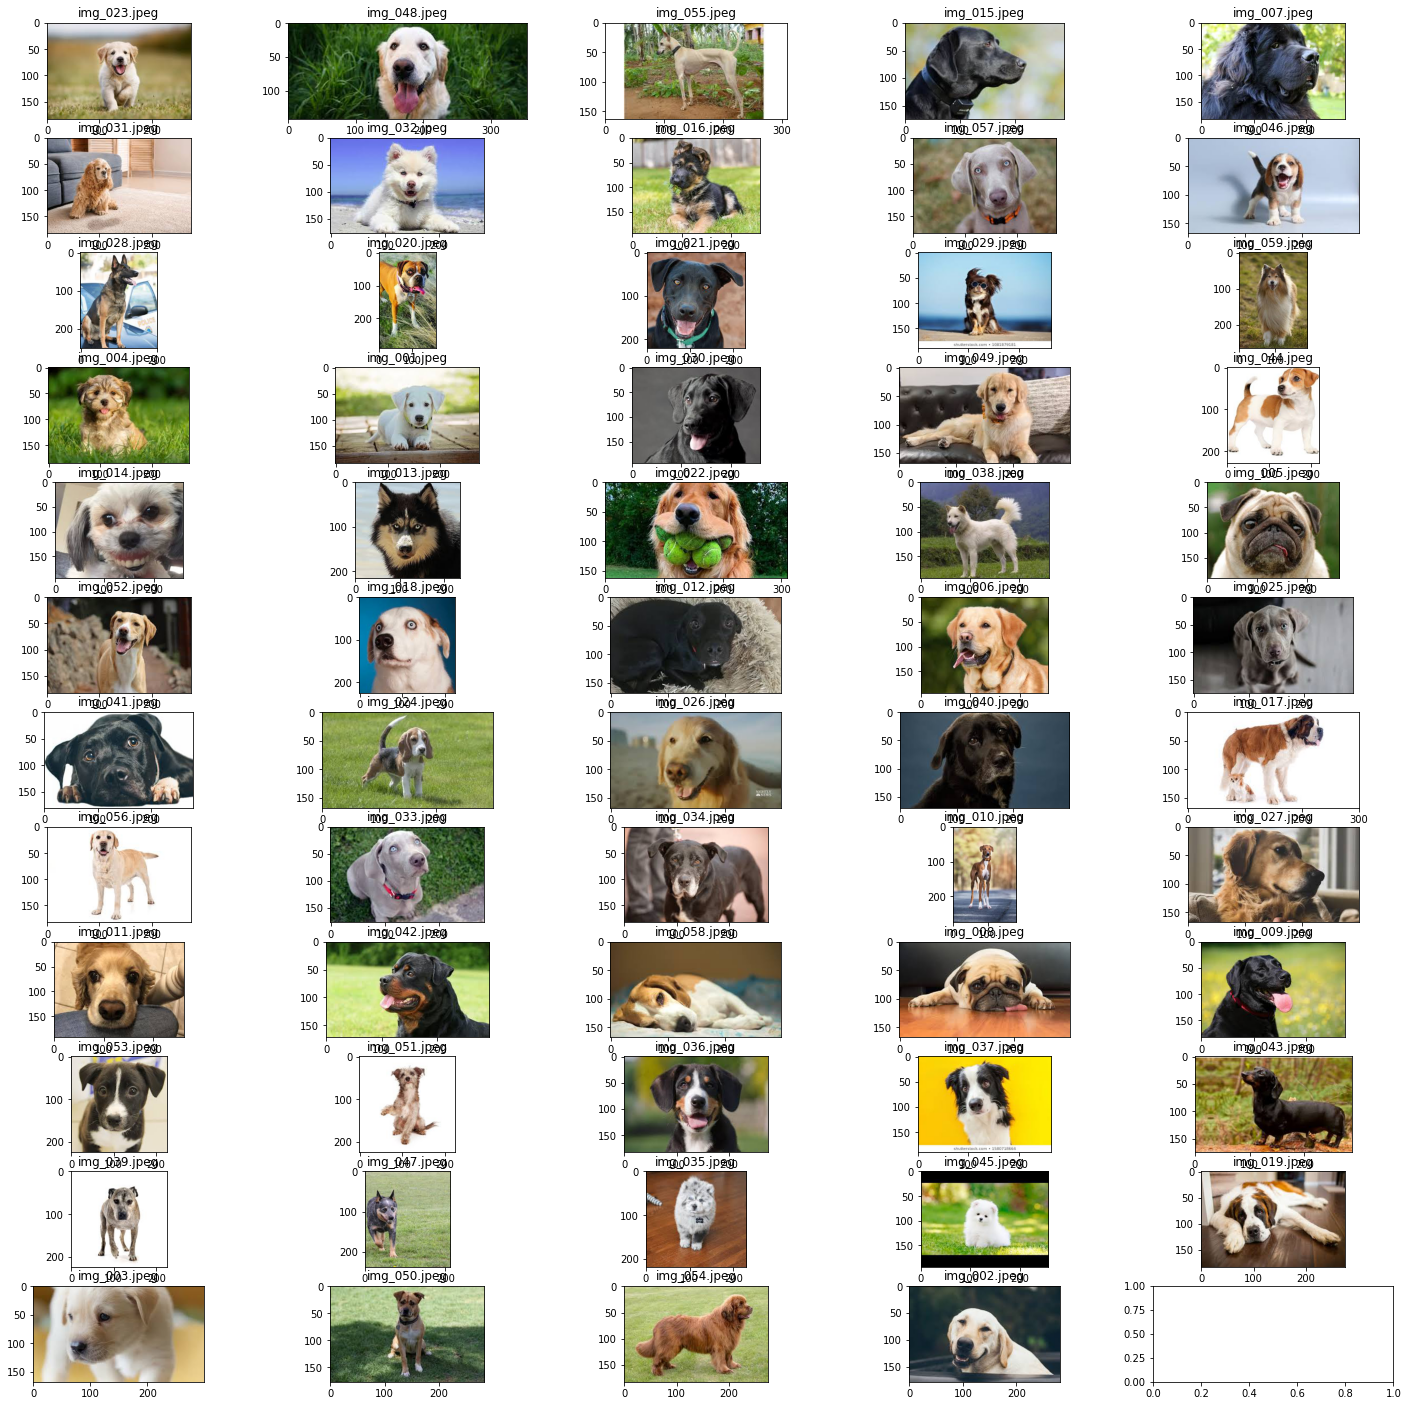

In [36]:

import matplotlib.pyplot as plt
%matplotlib inline
image_list = image_loader()

_, axes = plt.subplots(12, 5, figsize=(25, 25))
 
axes = axes.flatten()

for img,ax in zip(image_list, axes):
    name = img.filename.split('/')[1]
    ax.imshow(img)
    ax.title.set_text(name)
    
plt.show()

## Read annotation file

In [0]:

import pandas as pd

json_df = pd.read_json('./annotation_json/annotation_DogDataset_json.json')


## Normalising Bounding Box based on Image dimentions

In [46]:
image_names = json_df.iloc[0][0:50]
#print(image_names[0])
sizes = json_df.iloc[1][0:50]
#print(attributes)
shape_attributes = json_df.iloc[2][0:50]
#shape_attributes is array starting with[
#print(shape_attributes)
nc_x_bbox = []
nc_y_bbox = []

n_w_bbox = []
n_h_bbox = []

for idx in range(50):
  shape_attributes = json_df.iloc[2][0:50]
  map = shape_attributes[0][0] # remove array and take dictionary of json
  x = map['shape_attributes']['x']
  y = map['shape_attributes']['y']
  region_width = map['shape_attributes']['width']
  region_height = map['shape_attributes']['height']
  #normalize 
  image_name = image_names[idx][0:7]
  #print(image_name,"-size-",map_image_sizes[image_name][1],'x=',x,'nx=',(x/map_image_sizes[image_name][1]))
  n_x = x/image_name_size_dict[image_name][1]
  n_y = y/image_name_size_dict[image_name][0]
  n_region_width = region_width / image_name_size_dict[image_name][1]
  n_region_height = region_height / image_name_size_dict[image_name][0]
  n_w_bbox.append(n_region_width)
  n_h_bbox.append(n_region_height)

  #print(x,y,region_width,region_height, n_x, n_y,n_region_width,n_region_height)
  #map_image_sizes['imagename':(height,width)]
  #print(map_image_sizes.get(image_names[idx])[1]) 
  # Now calculate centrods of the normalized bounding box/region
  nc_x_bbox.append(n_x + (n_region_width/2))
  nc_y_bbox.append(n_y + (n_region_height/2)) 

print("Normalized:Centroids:X,Y Lists")
print(nc_x_bbox)
print(nc_y_bbox) 

print("Normalized::Width,Height Lists")
print(n_w_bbox)
print(n_h_bbox)

Normalized:Centroids:X,Y Lists
[0.76775956284153, 0.7849162011173184, 0.8363095238095237, 0.7594594594594595, 0.7356020942408377, 0.76775956284153, 0.8363095238095237, 0.76775956284153, 0.510909090909091, 0.7279792746113989, 0.8363095238095237, 0.6534883720930232, 0.7242268041237114, 0.8074712643678161, 0.7242268041237114, 0.8363095238095237, 0.6244444444444444, 0.76775956284153, 0.4828178694158075, 0.6357466063348416, 0.8619631901840491, 0.76775956284153, 0.8363095238095237, 0.8074712643678161, 0.8363095238095237, 0.8363095238095237, 0.5597609561752988, 0.7394736842105263, 0.7242268041237114, 0.76775956284153, 0.7937853107344632, 0.7937853107344632, 0.76775956284153, 0.6415525114155252, 0.76775956284153, 0.7394736842105263, 0.7242268041237114, 0.6272321428571428, 0.831360946745562, 0.7805555555555556, 0.8168604651162791, 0.8028571428571429, 0.6135371179039302, 0.7242268041237114, 0.8363095238095237, 0.5903361344537815, 0.9894366197183099, 0.8363095238095237, 0.7937853107344632, 0.6244

## FIND CLUSTERS FROM NORMALIZED WIDTH AND HEIGHT - KNN algorithm

Cluster Centers: [[0.77051517 0.45014337]
 [0.60737015 0.57455462]
 [0.85521421 0.4055666 ]]


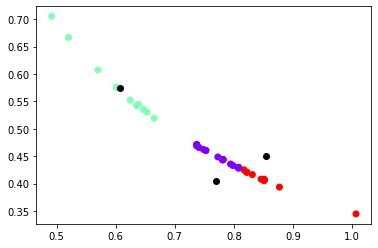

In [47]:

import pandas as pd

df1 = pd.DataFrame({
    'x': n_w_bbox,
    'y': n_h_bbox
})

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(df1)
print("Cluster Centers:",kmeans.cluster_centers_)

plt.scatter(n_w_bbox,n_h_bbox, c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans1.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')

## USING ELBOW METHOD: FIND NUMBER OF CLUSTERS USING DISTORTION AND INERTIA

In [0]:
import numpy as np
from scipy.spatial.distance import cdist 
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,10) 
X = np.array(list(zip(n_w_bbox, n_h_bbox))).reshape(len(n_w_bbox), 2)   
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(X) 
    kmeanModel.fit(X)     
      
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / X.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / X.shape[0] 
    mapping2[k] = kmeanModel.inertia_

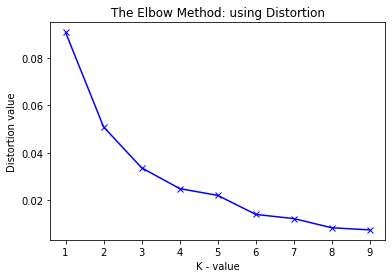

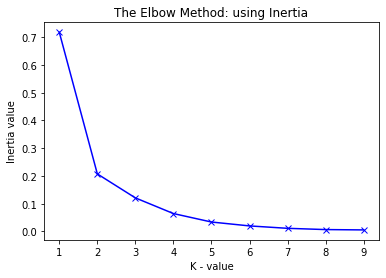

In [49]:
plt.plot(K, distortions, 'bx-') 
plt.xlabel('K - value') 
plt.ylabel('Distortion value') 
plt.title('The Elbow Method: using Distortion') 
plt.show() 

plt.plot(K, inertias, 'bx-') 
plt.xlabel('K - value') 
plt.ylabel('Inertia value') 
plt.title('The Elbow Method: using Inertia') 
plt.show()

### K = 4 seems to be optimal clustart **number**

#### Inertia starts decreasing from K=3, Distortion is also dereading at K = 5
#### So K =4 seems to be the optimal one.

